In [2]:
import pandas as pd
import os
import numpy as np
import cv2
from tqdm import tqdm
from glob import glob
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE

In [3]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [4]:
# _KVASIR_CAPSULE = 'D:\\data\\endoscopic\\kvasir_capsule'
# _KVASIR_CAPSULE_DEFORM = 'D:\\data\\endoscopic\\kvasir_capsule_deform'

# _HYPER_KVASIR = 'D:\\data\\endoscopic\\hyper_kvasir'
_HYPER_KVASIR_LABELED_DEFORM = 'D:\\data\\endoscopic\\hyper_kvasir\\labeled_images_deform'

In [5]:
# categories_path = glob(os.path.join(_HYPER_KVASIR,'*'))
# categories_path

In [6]:
# df_anno = pd.read_csv(os.path.join(_HYPER_KVASIR,'labeled-images','image-labels.csv'))
# df_anno.head()

df_anno = pd.read_csv(os.path.join('../resource/hyper_kvasir/full_labeled_anno.csv'))
df_anno.head()

,Organ,Classification,Finding,Image,Categories,is_valid
0,upper-gi-tract,anatomical-landmarks,z-line,upper-gi-tract/anatomical-landmarks/z-line/c7e...,0,False
1,lower-gi-tract,therapeutic-interventions,dyed-lifted-polyps,lower-gi-tract/therapeutic-interventions/dyed-...,0,False
2,lower-gi-tract,quality-of-mucosal-views,bbps-2-3,lower-gi-tract/quality-of-mucosal-views/bbps-2...,0,False
3,lower-gi-tract,quality-of-mucosal-views,bbps-2-3,lower-gi-tract/quality-of-mucosal-views/bbps-2...,0,False
4,upper-gi-tract,anatomical-landmarks,z-line,upper-gi-tract/anatomical-landmarks/z-line/b98...,0,False


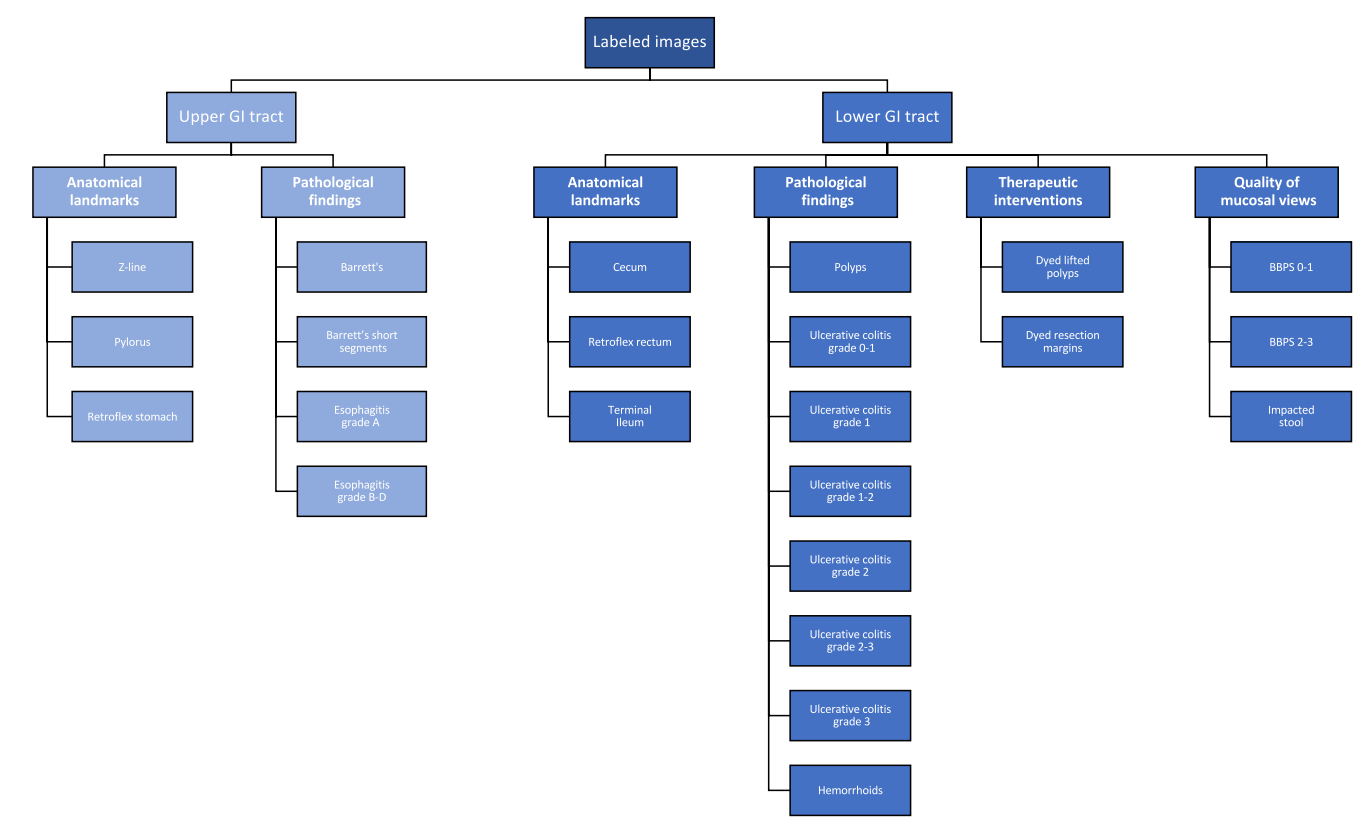

## Groupby categories

In [9]:
group_dict_cat = {9: 1,
                 6: 1,
                 8: 2,
                 5: 2,
                 12: 3,
                 10: 4,
                 4: 5,
                 2: 5,
                 7: 5,
                 1: 5,
                 11: 5,
                 3: 5,
                 0:0}

In [10]:
list_group_cat = [group_dict_cat[item] for item in list(df_anno['Categories'])]

In [11]:
df_anno['Groupby_Categories'] = list_group_cat

In [12]:
df_anno['Groupby_Categories'].value_counts()

0    8020
2    1056
5     871
4     403
3     260
1      52
Name: Groupby_Categories, dtype: int64

In [13]:
df_anno['Categories'].value_counts()

0     8020
5     1028
7      443
10     403
12     260
4      201
2      133
1       53
9       41
3       35
8       28
6       11
11       6
Name: Categories, dtype: int64

In [16]:
df_train, df_valid = train_test_split(df_anno, test_size=0.25, random_state=0)
df_train['is_valid'] = False
df_valid['is_valid'] = True
df_full = pd.concat([df_train, df_valid], axis=0)

C:\Users\Admin\anaconda3\envs\cls\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\anaconda3\envs\cls\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
df_valid['Groupby_Categories'].value_counts()

In [19]:
df_full.to_csv('../resource/hyper_kvasir/full_labeled_group.csv', index=False, header=True)